In [1]:
import numpy as np # 파이썬에서 연산을 도와주는 라이브러리
import matplotlib.pyplot as plt # 파이썬에서 그래프를 그려주는 라이브러리
import time # 함수 작동 시간 측정을 위해 사용하는 라이브러리

In [2]:
# 변수 설정 : n과 t는 매번 변하기에 기록하지 않는다.

m = 100
dt = 1
nr = 100000
T = 100

# 첫번째 시뮬레이션 : 1번에 1개의 입자만 기록

In [3]:
# 동전던지기를 표현하는 함수 생성. 
# 0 ~ 1 사이 난수를 생성하는 함수와, 반올림을 해주는 함수를 사용해서 만들었습니다.
def coin():
    return 2*np.round(np.random.uniform(),0)-1

In [4]:
# 동전 던지기 함수 테스트

for i in range(0,10):
    print(coin())

-1.0
-1.0
-1.0
1.0
-1.0
1.0
1.0
-1.0
-1.0
-1.0


In [5]:
n_array = np.zeros(int(T/dt)+1) # 위치의 평균을 기록하기 위해 만듬
n_var_array = np.zeros(int(T/dt)+1) # 위치의 분산을 기록하기 위해 만듬
t_array = np.linspace(0,T,int(T/dt)+1) # 시간 array

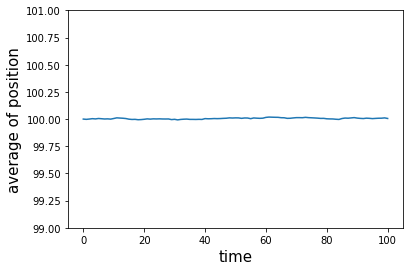

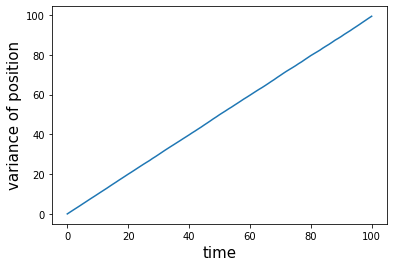

걸리는 시간 :  72.74338102340698


In [6]:
start = time.time() # 시작하는 시간 기록

for i in range(0,nr):
    t = 0
    n = m

    while t < T:
        t += dt
        n += coin()
        n_array[int(t/dt)] += n
        n_var_array[int(t/dt)] += n**2

n_array = n_array / nr
n_var_array = n_var_array / nr - n_array**2


n_array[0] = m
n_var_array[0] = 0

plt.plot(t_array,n_array)
plt.ylim(m-1,m+1)
plt.xlabel('time', size = 15)
plt.ylabel('average of position', size = 15)
plt.show()

plt.plot(t_array,n_var_array)
plt.xlabel('time', size = 15)
plt.ylabel('variance of position', size = 15)
plt.show()

print('걸리는 시간 : ', time.time() - start)

# 두번째 시뮬레이션 : 1번에 nr개의 입자를 기록

In [7]:
n_matrix = np.ones((int(T/dt)+1,nr))*m # matrix 계산을 위해 고안
t_array = np.linspace(0,T,int(T/dt)+1) # 시간 array

In [8]:
# 동전던지기를 표현하는 matrix함수 생성. 
# 0 ~ 1 사이 난수를 생성하는 함수와, 반올림을 해주는 함수를 사용해서 만들었습니다.
def coin_matrix(nr):
    return 2*np.round(np.random.uniform(size = nr),0)-1

In [9]:
print(coin_matrix(10))

[-1.  1. -1.  1.  1. -1. -1. -1. -1.  1.]


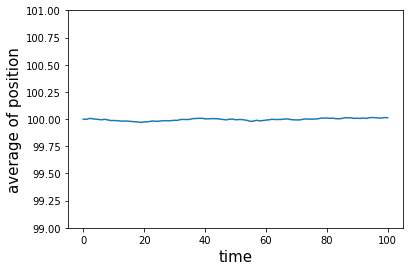

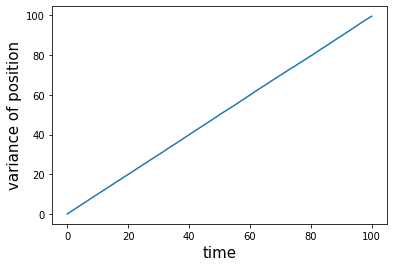

걸리는 시간 :  0.5316283702850342


In [10]:
start = time.time() # 시작하는 시간 기록

t = 0

while t < T:
    t += dt
    n_matrix[int(t/dt),:] = coin_matrix(nr)

n_position_matrix = np.cumsum(n_matrix, axis = 0)
n_position_average = np.average(n_position_matrix, axis = 1)
n_position_variance = np.average(n_position_matrix**2, axis = 1) - n_position_average**2


plt.plot(t_array, n_position_average)
plt.ylim(m-1,m+1)
plt.xlabel('time', size = 15)
plt.ylabel('average of position', size = 15)
plt.show()

plt.plot(t_array, n_position_variance)
plt.xlabel('time', size = 15)
plt.ylabel('variance of position', size = 15)
plt.show()

print('걸리는 시간 : ', time.time() - start)

위에서는 for와 while loop를 써서 코드를 짰습니다.

아래에서는 numpy의 matrix calculation을 이용했습니다.

매인 알고리즘은 비슷하나, 연산에 걸리는 시간이 크게 차이를 보입니다.!

(72.7 초와 0.53초... 거의 14배 빨라진 효과를 보이죠!)

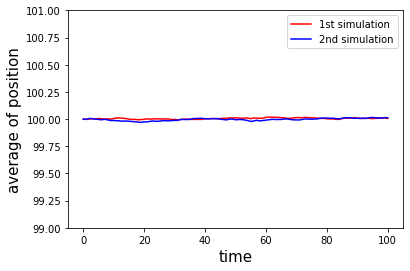

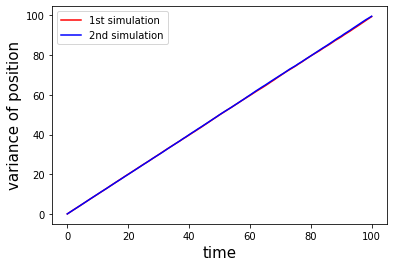

In [11]:
plt.plot(t_array,n_array, 'r-', label = '1st simulation')
plt.plot(t_array, n_position_average, 'b-', label = '2nd simulation')
plt.ylim(m-1,m+1)
plt.xlabel('time', size = 15)
plt.ylabel('average of position', size = 15)
plt.legend(loc='best')
plt.show()

plt.plot(t_array,n_var_array, 'r-', label = '1st simulation')
plt.plot(t_array, n_position_variance, 'b-', label = '2nd simulation')
plt.xlabel('time', size = 15)
plt.ylabel('variance of position', size = 15)
plt.legend(loc='best')
plt.show()


코드는 다르지만, 알고리즘이 같기에, 같은 결과가 나옴을 볼 수 있습니다.!